In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction
This project analyzes Goodreads book data to explore rating patterns, book popularity, and relationships between book length and reader ratings.

## Dataset Overview
The dataset contains information about books including title, authors, average ratings, number of ratings, page count, language, and publication details.

In [4]:
df = pd.read_csv("goodreads_books.csv", on_bad_lines="skip")
df.shape

(11123, 12)

In [5]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='str')

In [28]:
df.columns= df.columns.str.strip()

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  str    
 2   authors             11123 non-null  str    
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  str    
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  str    
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  str    
 11  publisher           11123 non-null  str    
dtypes: float64(1), int64(5), str(6)
memory usage: 1.0 MB


In [7]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [8]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

## Data Analysis

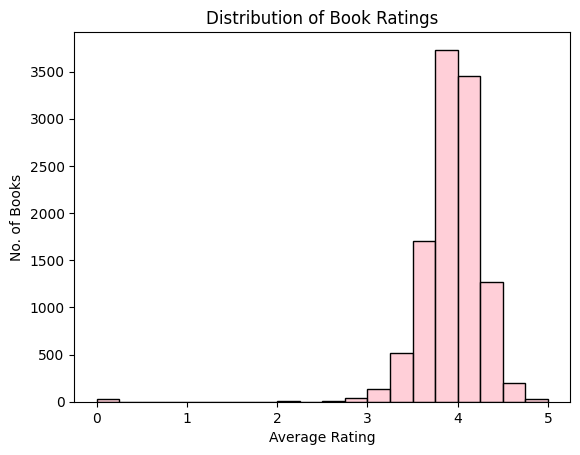

In [10]:
sns.histplot(df["average_rating"], bins=20, color="pink")
plt.title("Distribution of Book Ratings")
plt.xlabel("Average Rating")
plt.ylabel("No. of Books")
plt.show()

Most books are rated between 3.5 and 4.5, indicating generally positive reader feedback.

In [23]:
df.sort_values(by="ratings_count",ascending=False)[
    ["title","authors","average_rating","ratings_count"]
].head(10)

,title,authors,average_rating,ratings_count
10336,Twilight (Twilight #1),Stephenie Meyer,3.59,4597666
1697,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,2530894
1462,The Catcher in the Rye,J.D. Salinger,3.80,2457092
307,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,2339585
4415,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,2293963
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,2153167
23,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,2128944
2114,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,2111750
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,2095690


Sorting the dataset by ratings count reveals the most popular books. While these books have high reader engagement, their average ratings vary, showing that popularity does not always imply higher ratings.

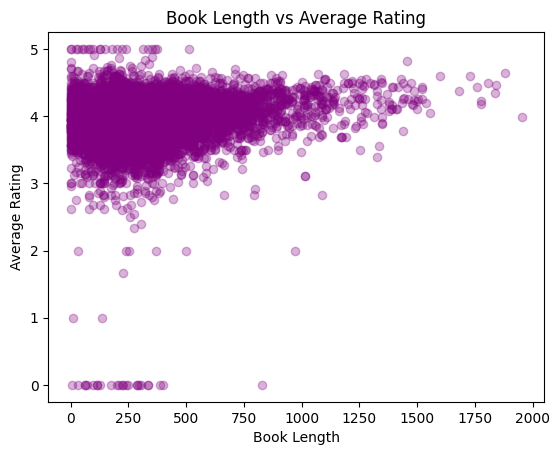

In [40]:
fil_df=df[df["num_pages"]<=2000]

plt.scatter(fil_df["num_pages"], fil_df["average_rating"],alpha=0.3, color="purple")
plt.xlabel("Book Length")
plt.ylabel("Average Rating")
plt.title("Book Length vs Average Rating")
plt.show()

Filtering out extreme outliers improves readability of the visualization. The absence of a clear trend indicates that book length alone is not a strong predictor of how highly a book is rated.

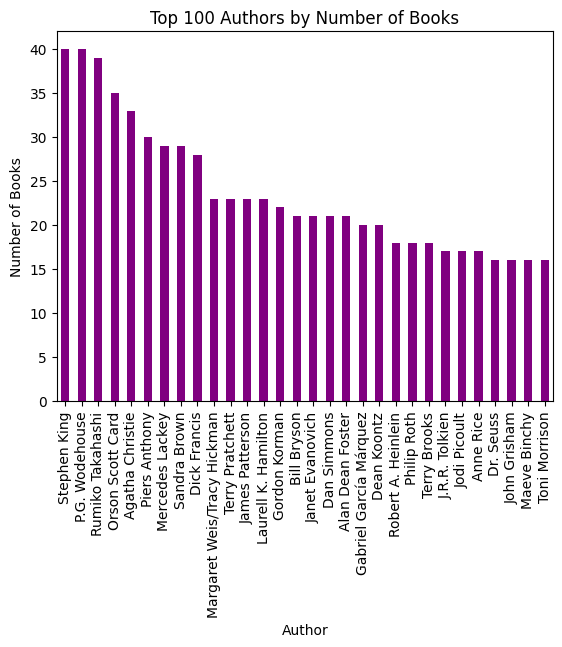

In [50]:
df["authors"].value_counts().head(30).plot(kind="bar", color="purple")
plt.title("Top 100 Authors by Number of Books")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.show()

A small number of authors have multiple books listed, while most authors appear only once, indicating a long-tail distribution.

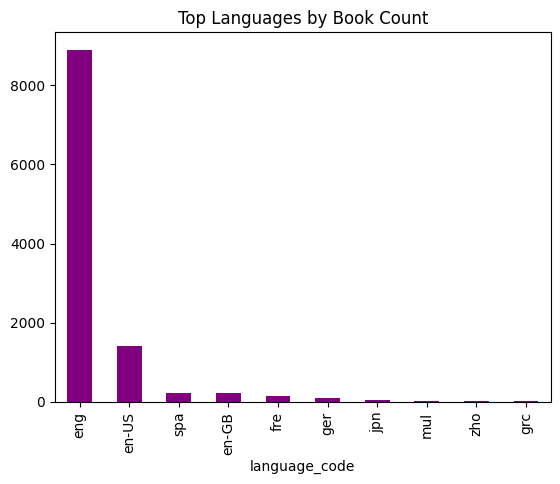

In [45]:
df["language_code"].value_counts().head(10).plot(kind="bar", color="purple")
plt.title("Top Languages by Book Count")
plt.show()

The dataset is predominantly composed of English-language books, with significantly fewer entries in other languages. This imbalance should be considered when interpreting results, as trends may largely reflect English-speaking readership.

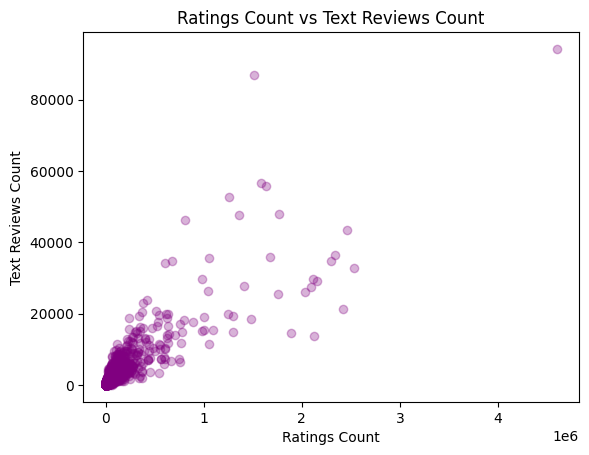

In [52]:
plt.scatter(df["ratings_count"], df["text_reviews_count"], alpha=0.3, color="purple")
plt.xlabel("Ratings Count")
plt.ylabel("Text Reviews Count")
plt.title("Ratings Count vs Text Reviews Count")
plt.show()

Books with higher ratings counts tend to have more text reviews, suggesting a positive relationship between popularity and reader engagement.

/Users/suhani/GoodReads-EDA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suhani/GoodReads-EDA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suhani/GoodReads-EDA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suhani/GoodReads-EDA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suhani/GoodReads-EDA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py

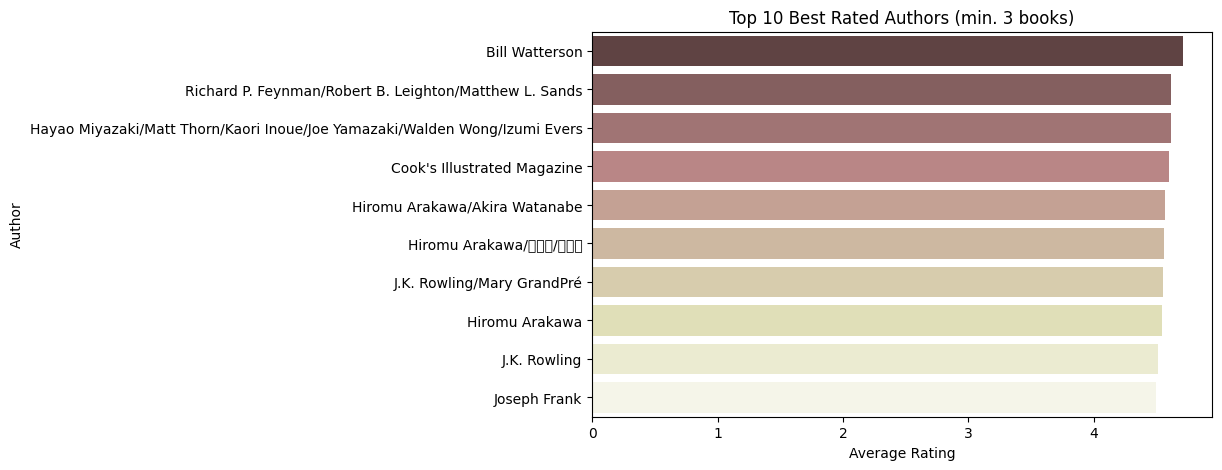

In [59]:
auth_ratings=(
    df.groupby("authors")["average_rating"]
    .mean()
    .reset_index()
)
auth_counts=df["authors"].value_counts() 
valid_authors=auth_counts[auth_counts>=3].index
auth_ratings=auth_ratings[auth_ratings["authors"].isin(valid_authors)]

top_auths=auth_ratings.sort_values(by="average_rating", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x="average_rating",
    y="authors",
    data=top_auths,
    hue="authors",
    palette="pink",
    legend=False
)
plt.title("Top 10 Best Rated Authors (min. 3 books)")
plt.xlabel("Average Rating")
plt.ylabel("Author")
plt.show()

Authors with multiple highly rated books consistently appear at the top, indicating sustained reader approval rather than isolated success.

In [46]:
df.to_csv("cleaned_goodreads_books.csv", index=False)